/var/folders/kb/1rjhgcjx66nby2g2h0tskpjc0000gn/T/ipykernel_64505/3776313401.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'is_nan_{col}'] = X[col].isna().astype(int)
/var/folders/kb/1rjhgcjx66nby2g2h0tskpjc0000gn/T/ipykernel_64505/3776313401.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'is_nan_{col}'] = X[col].isna().astype(int)
/var/folders/kb/1rjhgcjx66nby2g2h0tskpjc0000gn/T/ipykernel_64505/3776313401.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

Top 20 most important features:
B_avg_CTRL_time(seconds): 0.3579
B_avg_opp_CTRL_time(seconds): 0.2983
R_avg_CTRL_time(seconds): 0.2881
B_avg_TOTAL_STR_att: 0.2624
B_avg_opp_TOTAL_STR_att: 0.2406
R_avg_TOTAL_STR_att: 0.2099
B_avg_SIG_STR_att: 0.2081
R_avg_opp_CTRL_time(seconds): 0.2027
B_avg_opp_SIG_STR_att: 0.1963
R_avg_opp_TOTAL_STR_att: 0.1916
R_avg_SIG_STR_att: 0.1707
B_avg_DISTANCE_att: 0.1695
B_avg_HEAD_att: 0.1651
B_avg_opp_DISTANCE_att: 0.1649
R_avg_opp_SIG_STR_att: 0.1621
B_avg_opp_HEAD_att: 0.1551
R_avg_DISTANCE_att: 0.1421
R_avg_opp_DISTANCE_att: 0.1392
B_avg_TOTAL_STR_landed: 0.1368
B_Reach_cms: 0.1367


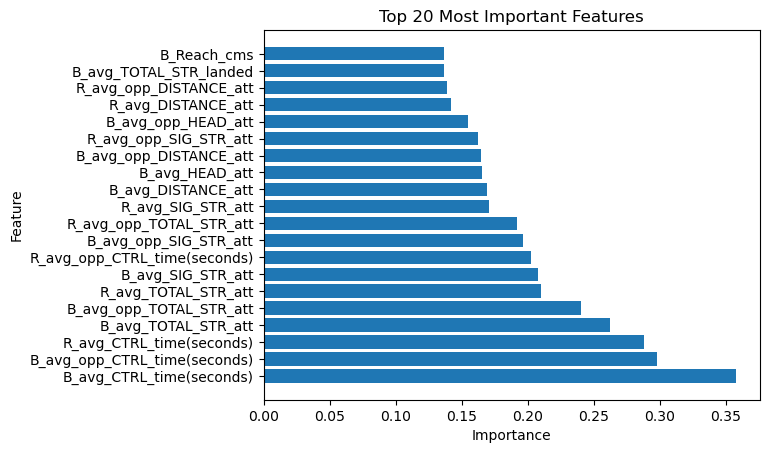

In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

df = pd.read_csv("data.csv/data.csv")
not_include_list = ["Referee","location","R_fighter","B_fighter","R_total_time_fought(seconds)","B_total_time_fought(seconds)","R_Weight_lbs","B_Weight_lbs"]
processed_df = df.drop(columns=not_include_list)

processed_df['date'] = pd.to_datetime(processed_df['date'])
cutoff_date = processed_df['date'].max() - timedelta(days=365)

processed_df = processed_df[processed_df['date'] < cutoff_date]

processed_df = processed_df.drop(columns=["date"])

X = processed_df.drop(columns=["Winner"])
X = X.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
string_cols = X.select_dtypes(['object']).columns

# one-hot encode all string columns
new_df = pd.get_dummies(X, columns=string_cols, drop_first=True)

X = new_df

y = processed_df["Winner"]
# select all boolean columns
bool_cols = new_df.select_dtypes(['bool']).columns

# convert boolean values to 0/1
new_df[bool_cols] = new_df[bool_cols].astype(int)

from sklearn.preprocessing import LabelEncoder

# assume 'df' is your dataframe and 'column_name' is the column you want to label encode
le = LabelEncoder()

y = le.fit_transform(y)

nan_cols = X.columns[X.isna().any()].tolist()

for col in nan_cols:
    X[f'is_nan_{col}'] = X[col].isna().astype(int)
    X[col] = X[col].fillna(0)

from sklearn.decomposition import PCA


pca = PCA(n_components=0.95)  # retain 95% of the variance

# Fit the PCA object to the data and transform it
X_pca = pca.fit_transform(X)

# Get the most important columns (features)
importance = pca.components_[0]

# Get the feature names
feature_names = X.columns

# Sort the feature names by importance
sorted_features = sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 most important features
print("Top 20 most important features:")
for feature, importance in sorted_features[:20]:
    print(f"{feature}: {importance:.4f}")


import matplotlib.pyplot as plt

# Get the top 10 most important features
# sorted_features = sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Extract the feature names and importance values
feature_names = [x[0] for x in sorted_features[:20]]
importance_values = [x[1] for x in sorted_features[:20]]

# Create a bar graph
plt.barh(range(len(feature_names)), importance_values)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.show()

In [2]:
y

array([2, 0, 2, ..., 2, 2, 2])

In [3]:
processed_df["Winner"]

477      Red
478     Blue
479      Red
480      Red
481     Blue
        ... 
6007     Red
6008     Red
6009     Red
6010     Red
6011     Red
Name: Winner, Length: 5535, dtype: object

In [4]:
X_new = X[feature_names]

In [5]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression()

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2)

In [7]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
model.score(X_test,y_test)

0.6648599819331527

In [9]:
old_df = pd.read_csv("ufc-master.csv/ufc-master.csv")
new_df = pd.read_csv("data.csv/data.csv")

old_df['date'] = pd.to_datetime(old_df['date'])

new_df['date'] = pd.to_datetime(new_df['date'], format='%Y/%m/%d')

old_df = old_df[old_df['date'] >= cutoff_date]
new_df = new_df[new_df['date'] >= cutoff_date]


old_df = old_df[['B_odds', 'R_odds', 'R_fighter', 'B_fighter', 'location', 'date']]

merged_df = pd.merge(new_df,old_df , on=['R_fighter', 'B_fighter', 'location', 'date'], how='inner')
merged_df = merged_df.dropna()
print(merged_df)

           R_fighter         B_fighter          Referee       date  \
0       Adrian Yanez     Gustavo Lopez    Chris Tognoni 2021-03-20   
1       Trevin Giles     Roman Dolidze        Herb Dean 2021-03-20   
4      Marion Reneau     Macy Chiasson       Mark Smith 2021-03-20   
5    Leonardo Santos      Grant Dawson    Chris Tognoni 2021-03-20   
6         Song Kenan       Max Griffin   Keith Peterson 2021-03-20   
..               ...               ...              ...        ...   
449     Henry Cejudo     Dominick Cruz   Keith Peterson 2020-05-09   
450    Vicente Luque        Niko Price     Jason Herzog 2020-05-09   
451       Greg Hardy  Yorgan De Castro        Herb Dean 2020-05-09   
452       Ryan Spann         Sam Alvey  Dan Miragliotta 2020-05-09   
453   Bryce Mitchell      Charles Rosa   Keith Peterson 2020-05-09   

                       location Winner  title_bout       weight_class  \
0        Las Vegas, Nevada, USA    Red       False       Bantamweight   
1        Las 

In [10]:
def compute_net_profit(odds, bet_value, correct, draw):
    if draw:
        return 0
    
    if correct:
        if odds > 0:  # positive odds
            profit = (odds / 100) * bet_value
        else:  # negative odds
            profit = (100 / abs(odds)) * bet_value
    else:
        profit = -bet_value  # lost the bet, profit is negative bet value
    return profit

In [13]:
#get the odds 
model_df = merged_df[feature_names]
print(model_df.shape)
print(merged_df.shape)
net_profit = 0
bet_value = 100
net_profits = []
fight_number = []
profits = []

for index in range(merged_df.shape[0]):
   row = merged_df.iloc[index]
   features = model_df.iloc[[index]]
   pred = model.predict(features)

   R_odds = row['R_odds']
   B_odds = row['B_odds']
   assert(row['Winner'] == 'Red' or row['Winner'] == 'Blue' or row['Winner'] == 'Draw')
   # Predict red
   if (pred[0] == 2):
      profit = compute_net_profit(R_odds, bet_value, row['Winner'] == 'Red', row['Winner'] == 'Draw')
      net_profit += profit
   elif (pred[0] == 0):
      profit =  compute_net_profit(B_odds, bet_value, row['Winner'] == 'Blue', row['Winner'] == 'Draw')
      net_profit += profit
   profits.append(profit)
   net_profits.append(net_profit)
   fight_number.append(index+1)
     
print(net_profit)


(344, 20)
(344, 146)
2186.9829052237587


In [14]:
print(profits)

[46.51162790697674, 86.95652173913044, -100, -100, 52.63157894736842, 175.0, -100, 30.303030303030305, 250.0, 52.63157894736842, -100, 76.92307692307693, 37.03703703703704, -100, -100, -100, -100, -100, 68.96551724137932, 14.285714285714285, 21.73913043478261, 64.51612903225806, -100, 72.99270072992701, 45.45454545454545, -100, 44.44444444444444, -100, -100, 66.66666666666666, -100, -100, 63.69426751592356, -100, -100, -100, -100, -100, 37.735849056603776, 110.00000000000001, -100, 89.28571428571429, -100, -100, 56.49717514124294, 35.97122302158273, 39.52569169960474, 48.78048780487805, 100.0, -100, 77.51937984496125, -100, -100, 105.0, -100, -100, 175.0, 140.0, 69.93006993006993, 105.0, 85.47008547008546, 250.0, 74.6268656716418, 250.0, -100, -100, -100, 128.0, -100, 105.0, -100, 74.6268656716418, 120.0, 32.78688524590164, 25.0, 69.93006993006993, 130.0, 52.63157894736842, -100, -100, -100, -100, -100, -100, 43.47826086956522, 150.0, -100, 160.0, 97.0873786407767, -100, -100, 90.90909

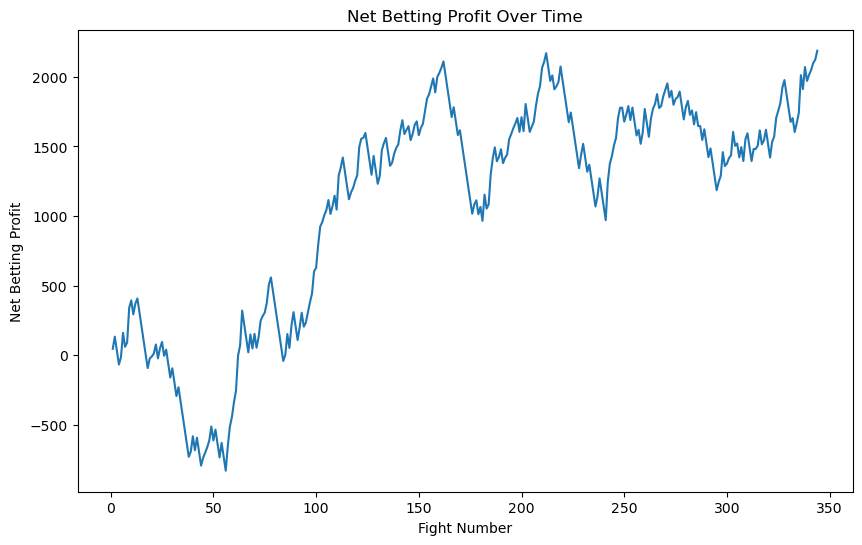

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fight_number, net_profits)
ax.set_xlabel('Fight Number')
ax.set_ylabel('Net Betting Profit')
ax.set_title('Net Betting Profit Over Time')
plt.show()